# Homework 4

### Problem 1

In [6]:
# importing all necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

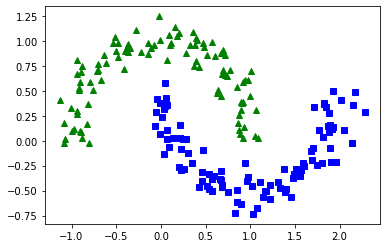

In [5]:
# Part a
n = 200
X, y = datasets.make_moons(n_samples = n, noise = 0.1, random_state = 69)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

# Split the dataset into training set and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=556)

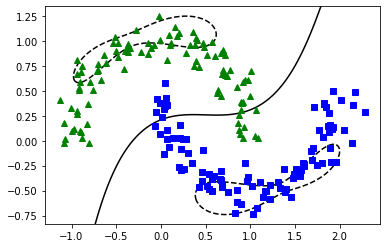

In [6]:
#Create an svm model
clf = svm.SVC(C = 0.05) #note we did not give it any specific kernal type
clf.fit(X, y)
ax = plt.gca() #get current axes
# plot our points
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

#get the current x,y-axis limits in data coordinates
xlim = ax.get_xlim() 
ylim = ax.get_ylim()
x_min, x_max = xlim[0] - 0.5, xlim[1] + 0.5
y_min, y_max = ylim[0] - 0.5, ylim[1] + 0.5

#Use mgrid to plot a dense multidimensional meshgrid
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
xy = np.c_[XX.ravel(), YY.ravel()]
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [7]:
# Definiing functions so that we can visulaize the SVM Model
def plot_contours(ax, clf, X, y, **params):
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    xy = np.c_[XX.ravel(), YY.ravel()]
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors=['k','k','k'], alpha=1,levels=[-1,0,1],linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)   

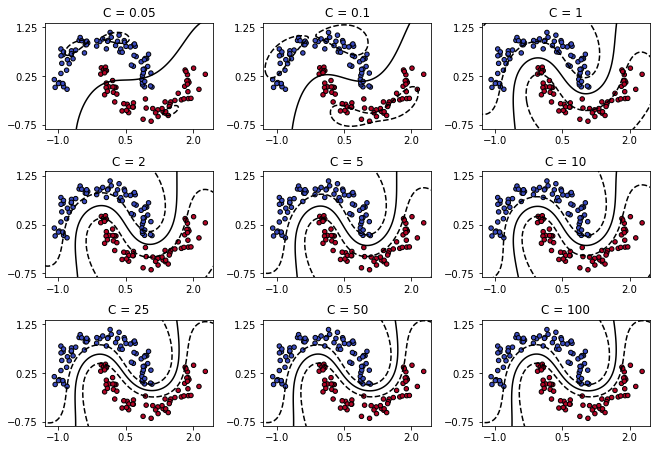

In [8]:
# part b

#defining our differnet options for values of C
c_values = [0.05,0.1,1,2,5,10,25,50,100]
clf = svm.SVC(C = 0.05)
clf.fit(X_train, y_train)
modles = [clf,clf,clf,clf,clf,clf,clf,clf,clf]
scores = np.zeros((1,9))
scores = scores[0]
mse = np.zeros((1,9))
mse = mse[0]

for i in range(len(c_values)): #loop through all values in c_value
    clf = svm.SVC(C = c_values[i])
    clf.fit(X_train, y_train)
    modles[i] = clf
    # accuracy evaluations for later
    scores[i] = clf.score(X_test,y_test)
    y_mse = clf.predict(X_test)
    mse[i] = mean_squared_error(y_mse,y_test)

fig, axs = plt.subplots(3,3)
X0, X1 = X_train[:, 0], X_train[:, 1]

count = 0

for i in range (3):
    for j in range(3):
        plot_contours(axs[i,j], modles[count], X_train, y_train, cmap=plt.cm.coolwarm, alpha=0.8) #plotting the data data
        axs[i,j].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') # plotting our points
        axs[i,j].set_title("C = "+str(c_values[count]))
        axs[i,j].set_xticks([-1,0.5,2])
        axs[i,j].set_yticks([-0.75,0.25, 1.25])
        count = count + 1
        
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.5,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.4)


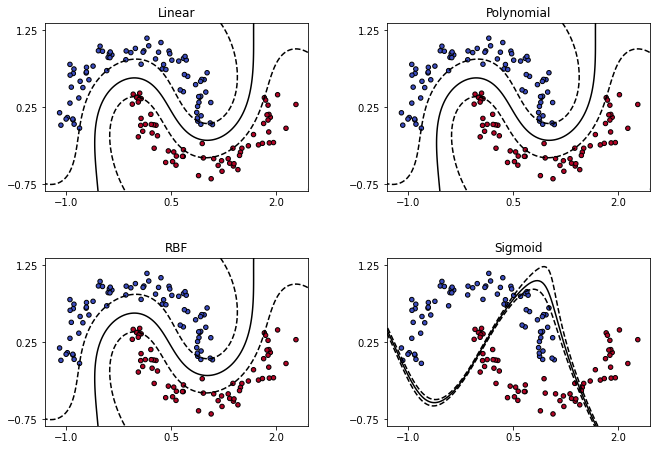

In [9]:
# part c

# Since we detemrined that a decent C value was C = 5,
# we will keep that constant and display the different 
# kernals. The kernals we will want to use are:  
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’.
clf_linear = svm.SVC(C = 5, kernel = 'linear')
clf_linear.fit(X_train, y_train)
score_linear = clf_linear.score(X_test,y_test)
y_mse_linear = clf_linear.predict(X_test)
mse_linear = mean_squared_error(y_mse_linear,y_test)

clf_poly = svm.SVC(C = 5, kernel = 'poly')
clf_poly.fit(X_train, y_train)
score_poly = clf_poly.score(X_test,y_test)
y_mse_poly = clf_poly.predict(X_test)
mse_poly = mean_squared_error(y_mse_poly,y_test)

clf_rbf = svm.SVC(C = 5, kernel = 'rbf')
clf_rbf.fit(X_train, y_train)
score_rbf = clf_rbf.score(X_test,y_test)
y_mse_rbf = clf_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_mse_rbf,y_test)

clf_sigmoid = svm.SVC(C = 5, kernel = 'sigmoid')
clf_sigmoid.fit(X_train, y_train)
score_sigmoid = clf_sigmoid.score(X_test,y_test)
y_mse_sigmoid = clf_sigmoid.predict(X_test)
mse_sigmoid = mean_squared_error(y_mse_sigmoid,y_test)

fig, axs = plt.subplots(2,2)
X0, X1 = X_train[:, 0], X_train[:, 1]

plot_contours(axs[0,0], clf_rbf, X, y, cmap=plt.cm.coolwarm, alpha=0.8)
axs[0,0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axs[0,0].set_title("Linear")
axs[0,0].set_xticks([-1,0.5,2])
axs[0,0].set_yticks([-0.75,0.25, 1.25])

plot_contours(axs[0,1], clf_rbf, X, y, cmap=plt.cm.coolwarm, alpha=0.8)
axs[0,1].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axs[0,1].set_title("Polynomial")
axs[0,1].set_xticks([-1,0.5,2])
axs[0,1].set_yticks([-0.75,0.25, 1.25])

plot_contours(axs[1,0], clf_rbf, X, y, cmap=plt.cm.coolwarm, alpha=0.8)
axs[1,0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axs[1,0].set_title("RBF")
axs[1,0].set_xticks([-1,0.5,2])
axs[1,0].set_yticks([-0.75,0.25, 1.25])

plot_contours(axs[1,1], clf_sigmoid, X, y, cmap=plt.cm.coolwarm, alpha=0.8)
axs[1,1].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axs[1,1].set_title("Sigmoid")
axs[1,1].set_xticks([-1,0.5,2])
axs[1,1].set_yticks([-0.75,0.25, 1.25])

fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.5,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.4)


In [10]:
# train the models for accuracy
print("Classifier Scores: ")
print("Linear: "+str(score_linear))
print("Polynomial: "+str(score_poly))
print("RBF: "+str(score_rbf))
print("Sigmoid: "+str(score_sigmoid))

print("Classifier MSE: ")
print("Linear: "+str(mse_linear))
print("Polynomial: "+str(mse_poly))
print("RBF: "+str(mse_rbf))
print("Sigmoid: "+str(mse_sigmoid))

Classifier Scores: 
Linear: 0.9166666666666666
Polynomial: 0.9666666666666667
RBF: 1.0
Sigmoid: 0.6333333333333333
Classifier MSE: 
Linear: 0.08333333333333333
Polynomial: 0.03333333333333333
RBF: 0.0
Sigmoid: 0.36666666666666664


## Problem 2

In [3]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

In [4]:
# import the data
digtis = load_digits()
X = digtis.data
y = digtis.target

print(type(X))

print(X)
print(X.shape)
print(y)
print(y.shape)

<class 'numpy.ndarray'>
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


[9 3 4 ... 5 4 1]


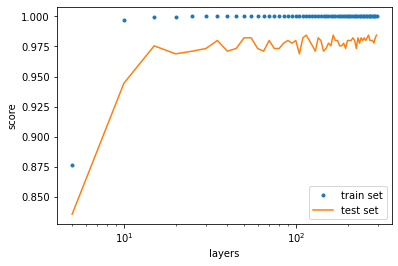

In [8]:
# part 3


# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=445)


# design MLP model
train_score = []
test_score = []
layers = list(range(5,300,5)) 
for i in layers:
   MLP = MLPClassifier(activation = 'logistic', 
                       solver = 'sgd', 
                       hidden_layer_sizes = (i,), 
                       alpha=1e-2, 
                       max_iter = 400,
                       learning_rate_init = 0.1)
   MLP.fit(X_train,y_train)
   train_score.append(MLP.score(X_train,y_train))
   test_score.append(MLP.score(X_test,y_test))

# Plot scores
plt.plot(layers,train_score,'.',label = 'train set')
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")

In [10]:
layers[test_score.index(max(test_score))]

print(type(y_train[1]))

<class 'numpy.int64'>
